In [1]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sympy import *
import matplotlib as mpl
import plotly.figure_factory as ff

##styling
seq = px.colors.qualitative.Set3

# Fitness Landscapes
This notebook shows how it is possible to create fitness landscape from known genotype relative fitness values.  
Change the $w_{ij}$ values to create different landscapes both in 2 or 3 dimensions.   

3D landscapes are obtained as product of 2 quadratic equations to keep things simple but this does not represent reality. 

In [2]:
## 2D landscape -- 1 locus 2 alleles
### Defining a 2d landscape constructor
def landscape2d(w11, w12, w22): #wij represents the relative fitness of genotype ij where i and j are alleles
    w_vec = []
    pt1_vec = []
    pp = np.arange(0, 1, 0.01)
    for i in pp:
        w_mean = i**2 * w11 + 2 * i * (1-i) * w12 + (1-i)**2 * w22
        w_vec.append(w_mean)
        der_pw = 2 * (i * (w11 - w12) + (1 - i) * (w12 - w22))
        deltaP = (i * (1 - i)) / (2 * w_mean) * der_pw
        pt1 = i + deltaP
        pt1_vec.append(pt1)

    fig = px.line(x=pp, y=w_vec, color_discrete_sequence=seq)
    fig.update_layout(
        yaxis_range=[0, 1],
        template='plotly_white'
    )
    fig.update_yaxes(
        title_text='Mean Population Fitness W'
    )
    fig.update_xaxes(
        title_text='Allele Frequency p'
    )
    fig.show('png', scale=4)

    fig2 = px.line(x=pp, y=pt1_vec, color_discrete_sequence=seq)
    fig2.update_layout(
        yaxis_range=[0, 1],
        template='plotly_white'
    )
    fig2.add_trace(go.Scatter(
        x=pp,
        y=pp,
        line=dict(dash='dot'),
        marker_color='rgba(0,0,0,0.4)',
        name='45-degree line'
    ))
    fig2.update_xaxes(
        title_text='p(t)'
    )
    fig2.update_yaxes(
        title_text='p(t+1)'
    )
    fig2.show('png', scale=4)
    return w_vec

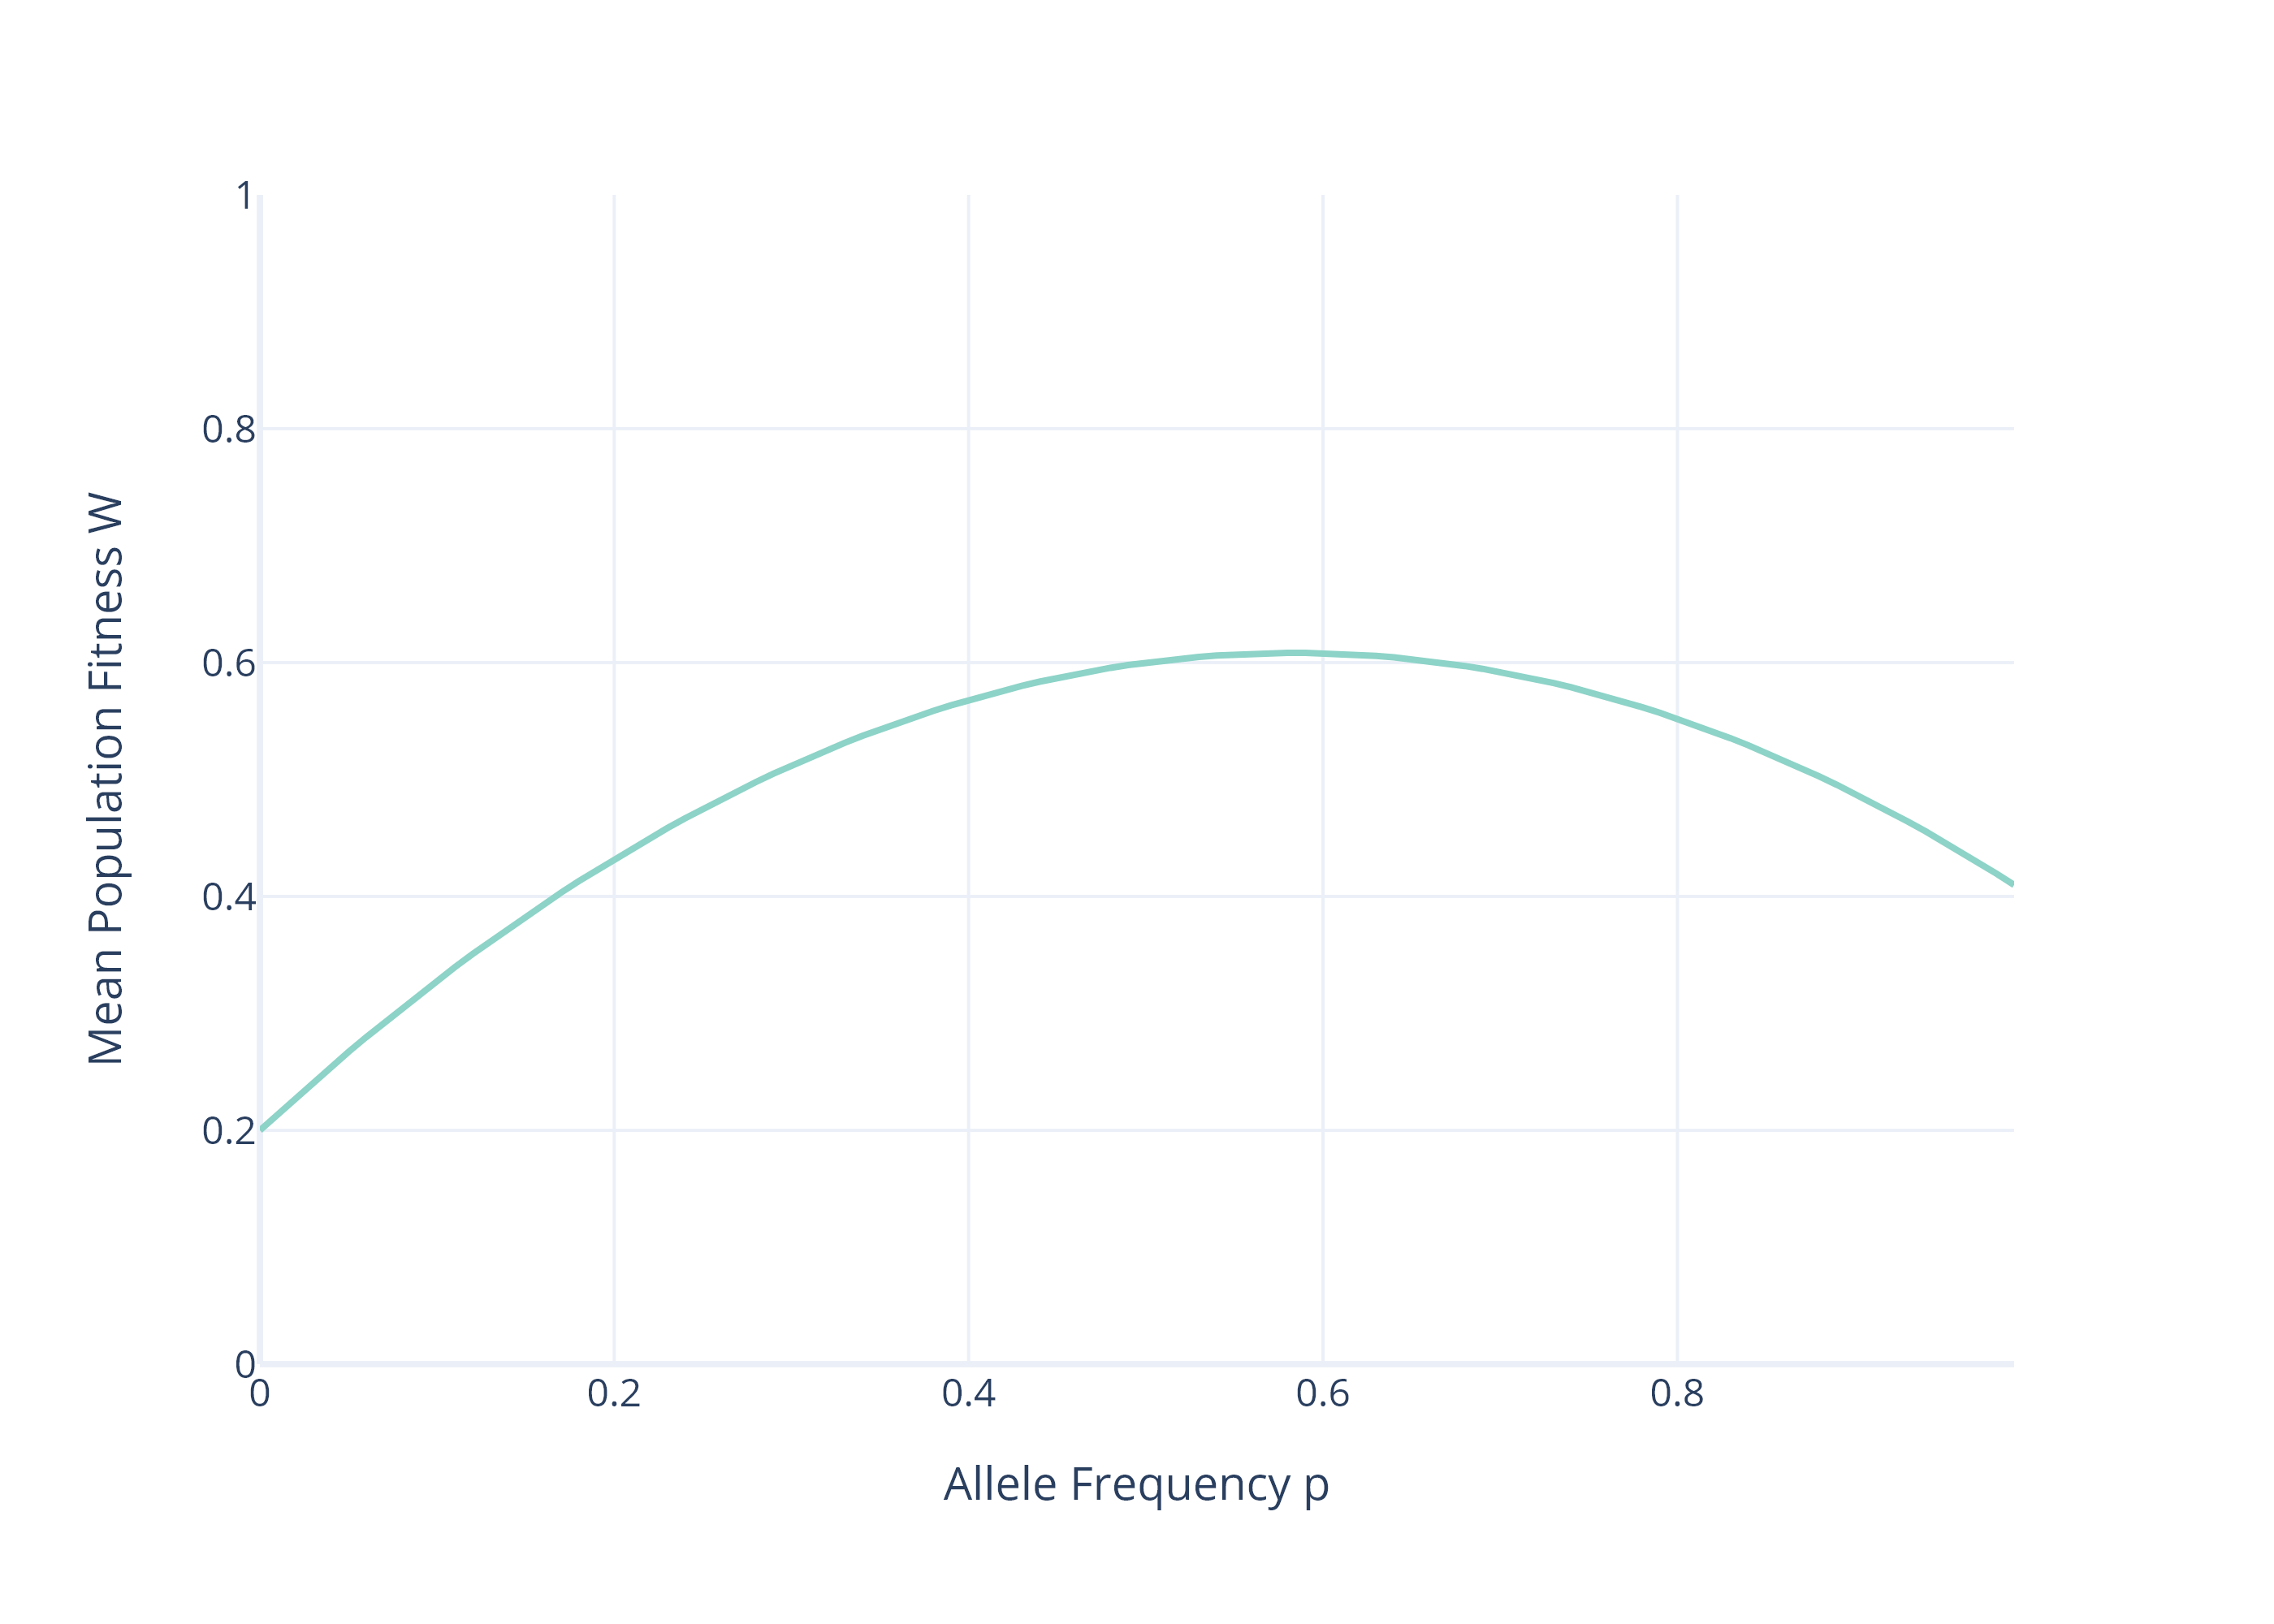

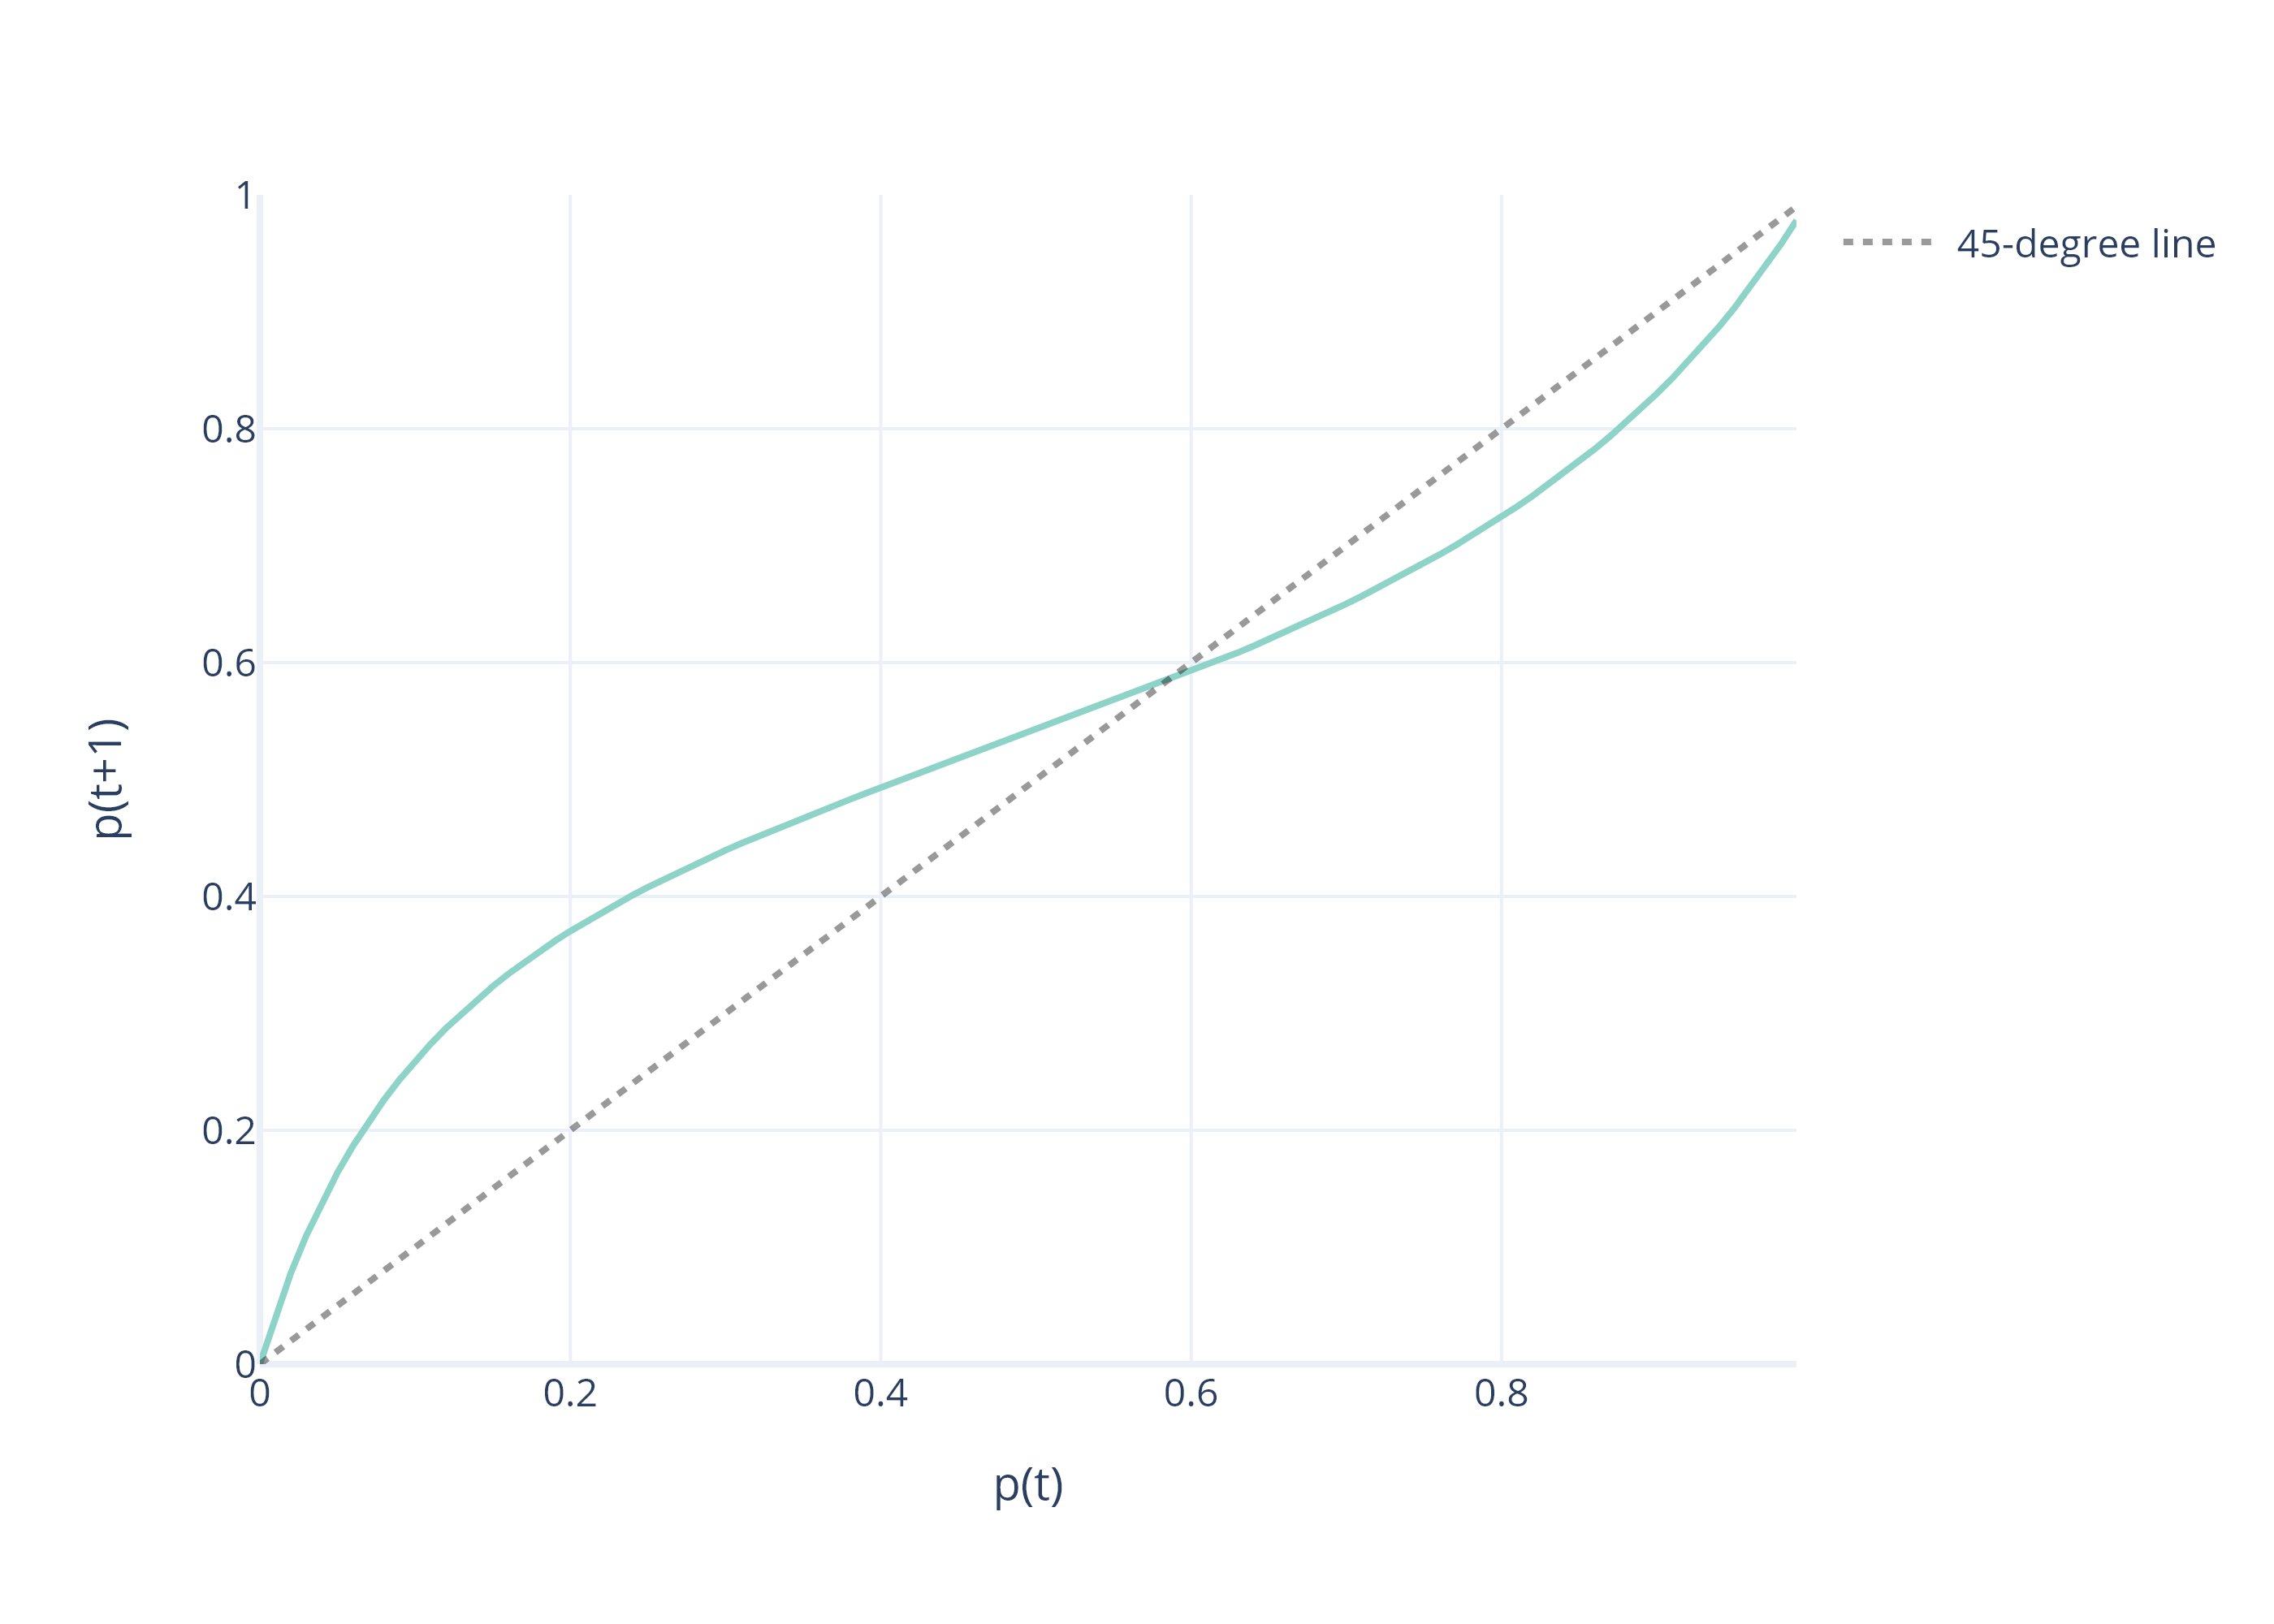

In [3]:
w11 = 0.4
w12 = 0.9
w22 = 0.2
land1 = landscape2d(w11,w12,w22)


In [4]:

## Landscape 3d  -- 2 loci A and B with independent genotype relative fitnesses wij and wijq
def landscape3d(w11, w12, w22, w11q, w12q, w22q):
    w_mtrx = []
    pp = np.arange(0, 1, 0.01)   # is the space of all possible frequencies for locus A
    qq = np.arange(0, 1, 0.01)   # is the space of all possible frequencies for locus B
    data = {}       #Contain mean of fitness w as columns
    for i in pp:
        pcolumn = []
        wp = i ** 2 * w11 + 2 * i * (1 - i) * w12 + (1 - i) ** 2 * w22
        for q in qq:
            wq = q ** 2 * w11q + 2 * q * (1 - q) * w12q + (1 - q) ** 2 * w22q
            w3d = wp * wq           #Assuming average fitness as product of each locus genotype fitness
            # w3d = (wp + wq)/2           #assuming average fitness as mean of each locus genotype fitness
            pcolumn.append(w3d)
        w_mtrx.append(pcolumn)

    fig = go.Figure()
    fig.add_trace(go.Surface(
        x=pp,
        y=qq,
        z=w_mtrx,
        colorscale='teal'
    ))
    fig.update_layout(
        template='plotly_white',
        height=800,
    )
    fig.show('png', scale=4)

    # Calculate Gradient and create quiver plot
    v, u = np.gradient(w_mtrx)  ## x and y components of arrows calculated for every point of the mesh
    x, y = np.meshgrid(np.arange(0, 1, .04),
                       np.arange(0, 1, .04))
    step=4     #filtering only 1/4 of the arrows to obtain a better plot
    nv = [[v[i*step][j*step] for i in range(25)] for j in range(25)]
    nu = [[u[i*step][j*step] for i in range(25)] for j in range(25)]

    fig2 = ff.create_quiver(x, y, nu, nv,
                            name='quiver',
                            arrow_scale=.2,
                            scale=3,
                            line_width=1,
                            marker_color='rgb(43, 88, 118)')
    fig2.update_layout(
        template='plotly_white',
        height=900,
    )
    fig2.show('png', scale=4)
    return w_mtrx

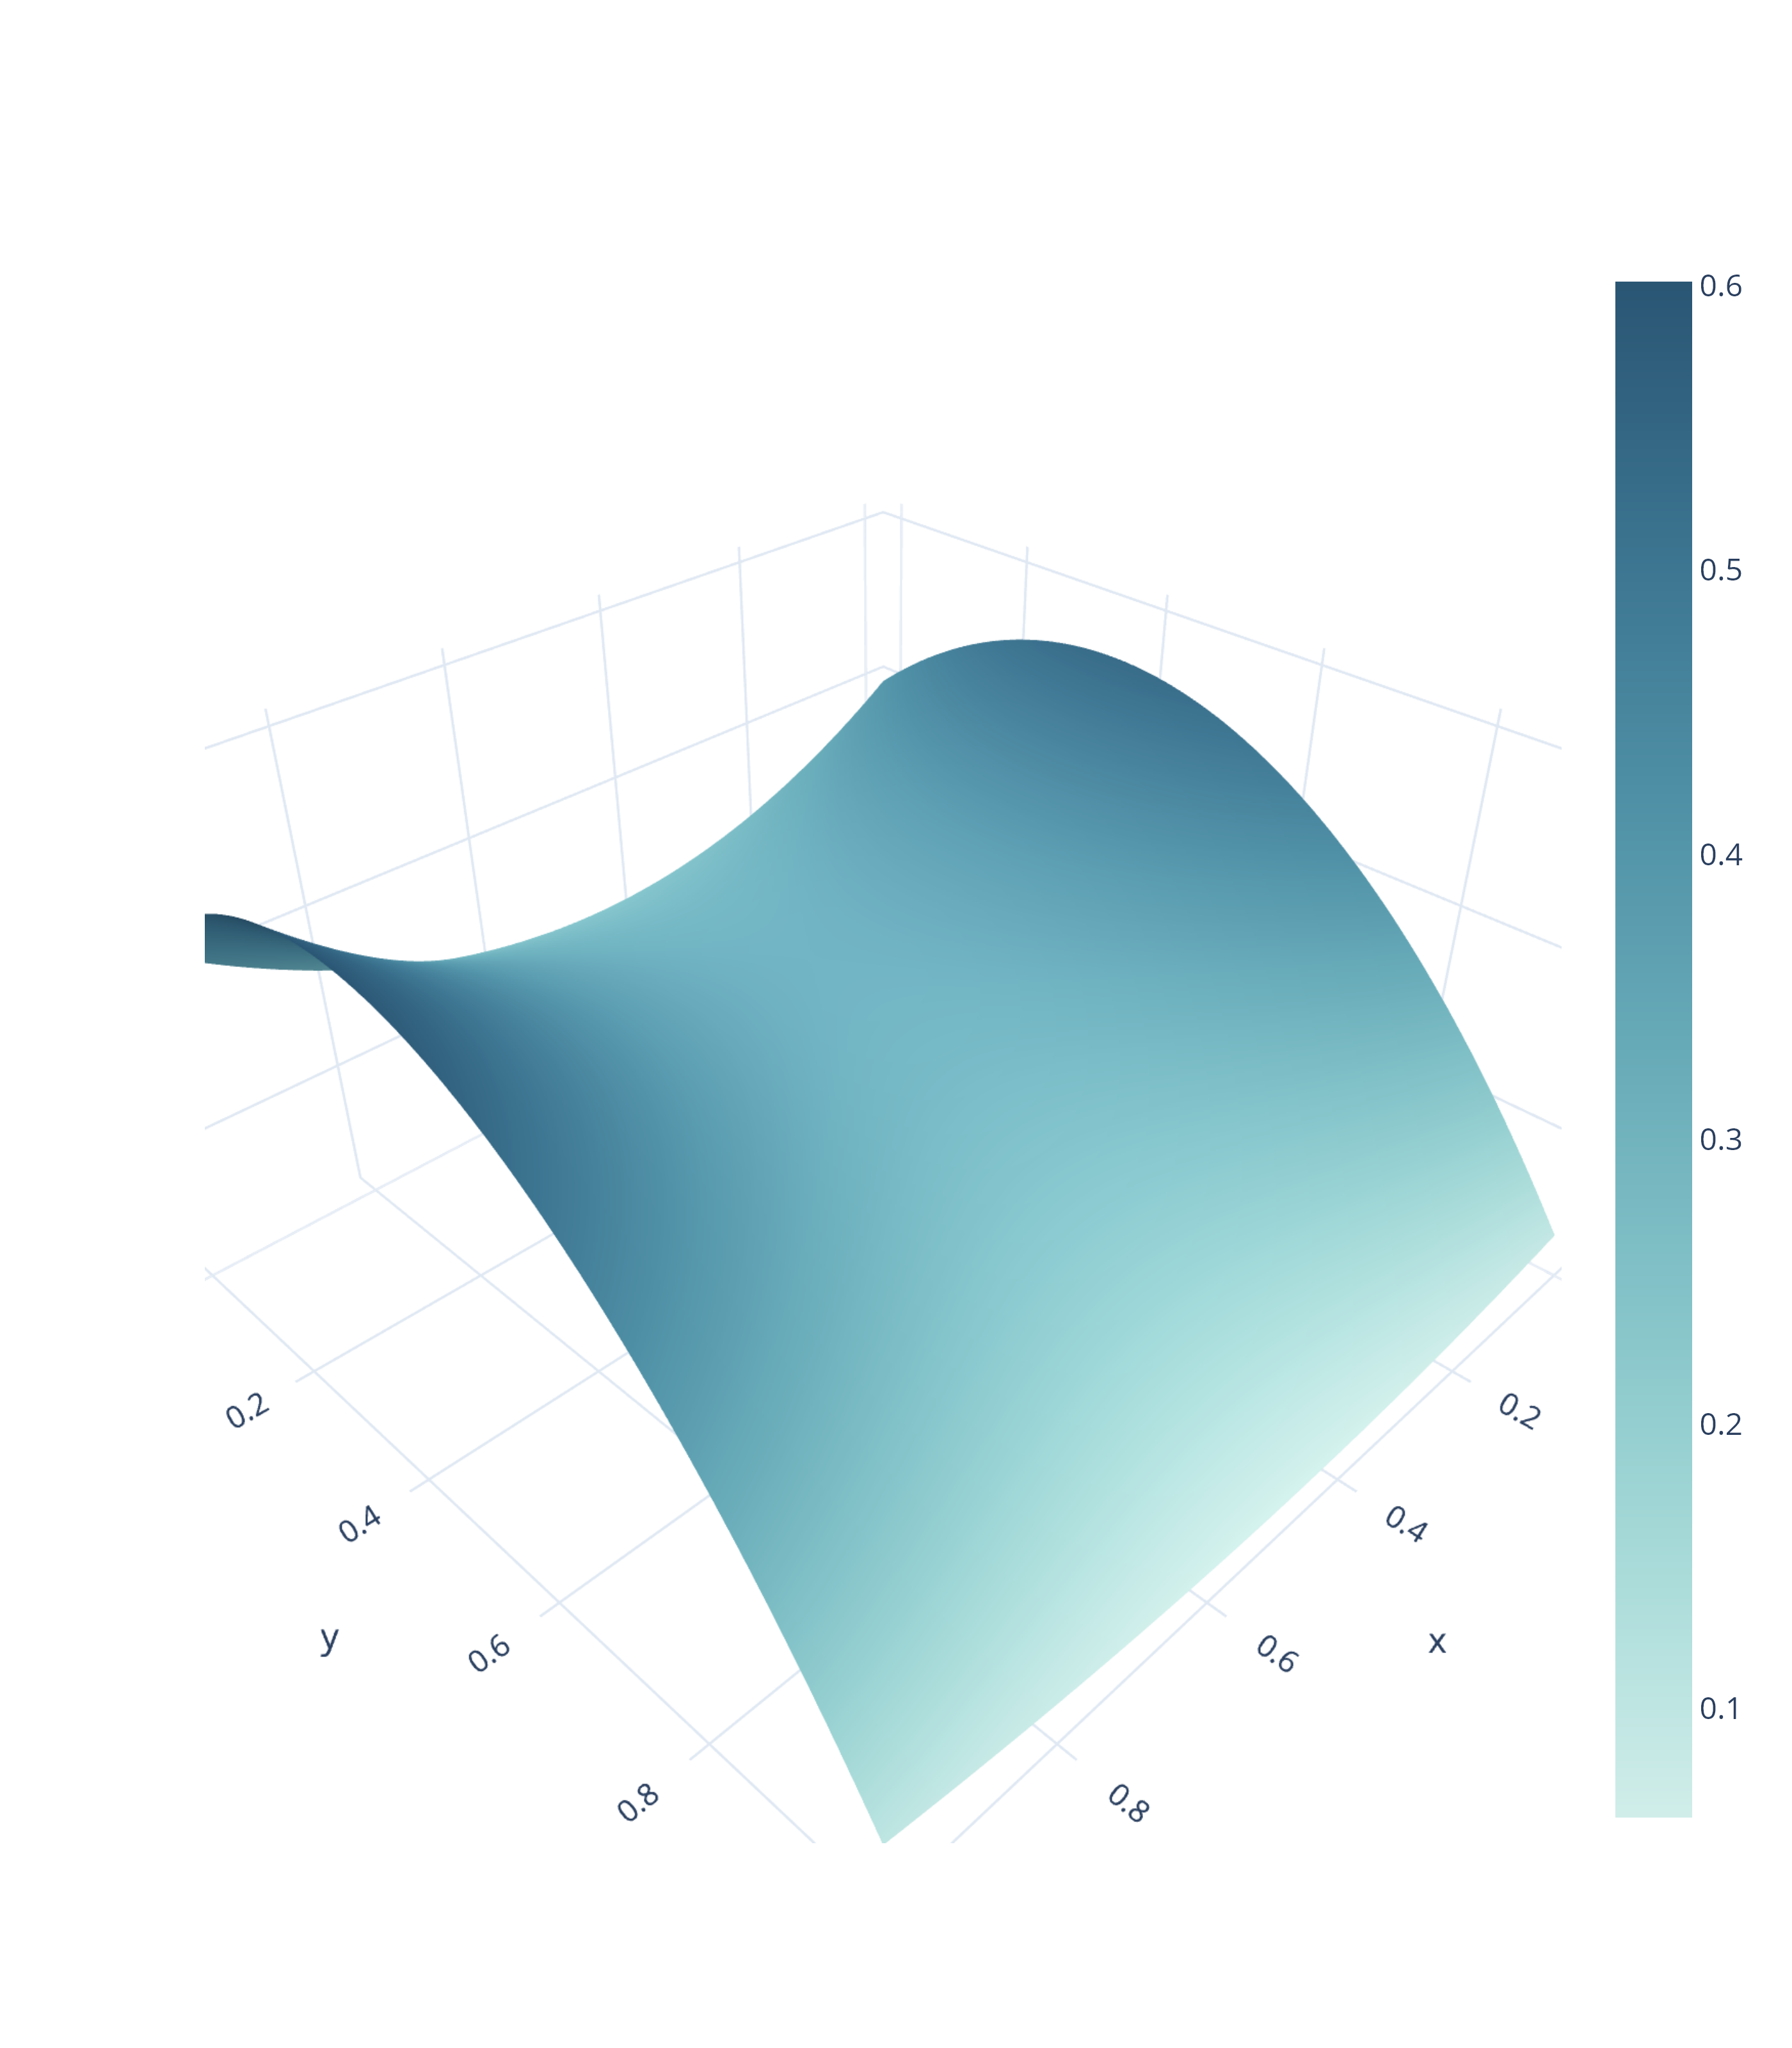

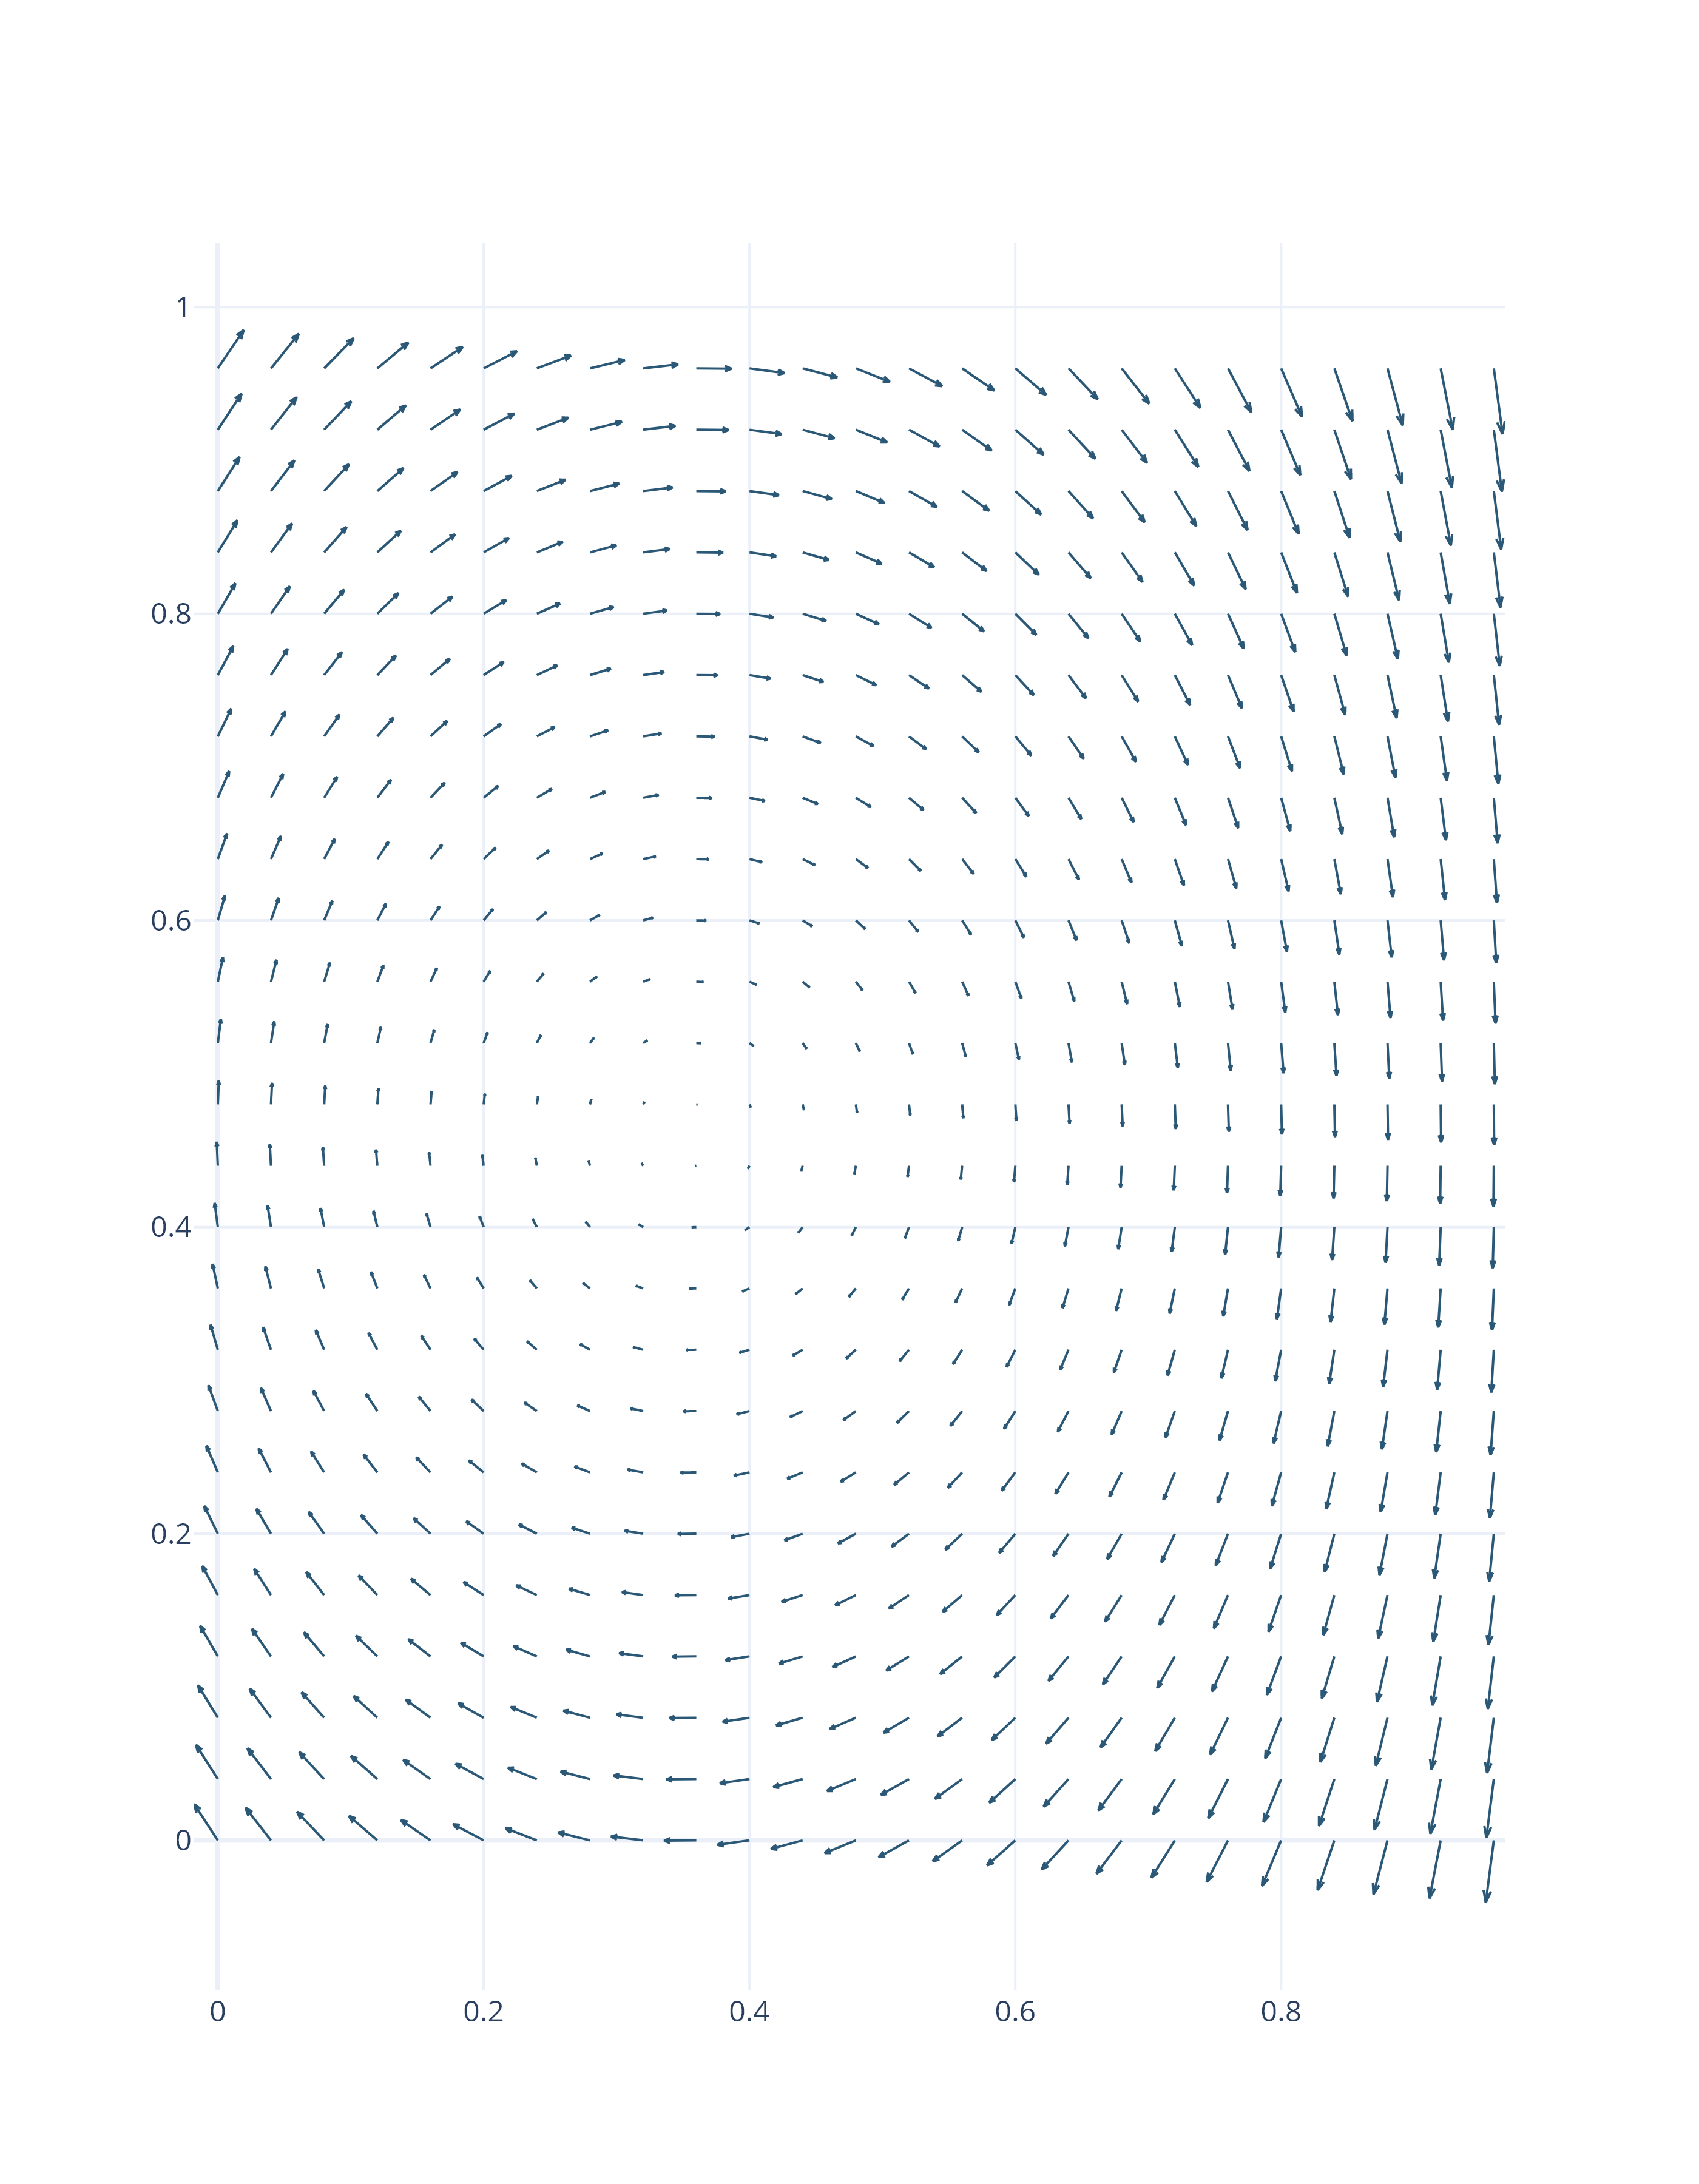

In [5]:
w11, w12, w22 = 0.1, 1, 0.5         # genotype relative fitness values for locus A
w11q, w12q, w22q = 0.9, 0.2, 0.8    # genotype relative fitness values for locus B

land3d = landscape3d(w11, w12, w22, w11q, w12q, w22q)